# **Simple Sentiment Analysis**

**Project Details:**Build a sentiment analysis model using a dataset of movie reviews or tweets.
This project involves natural language processing (NLP) and teaches you how to preprocess text data, use
word embeddings, and apply recurrent neural networks (RNNs) or other deep learning models to classify
sentiment as positive or negative.

In [17]:
!git config --global user.name "LaibaHere-19"
!git config --global user.email "amjadlaiba23@gmail.com"


In [18]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [19]:
!git clone https://github.com/LaibaHere-19/Projects.git


Cloning into 'Projects'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 42.60 KiB | 5.33 MiB/s, done.


# **Install required Libraries**

In [1]:
# Install required libraries
!pip install tensorflow keras nltk


# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt


# **Download NLTK Resources**

In [3]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Load Dataset**

In [4]:
# Load the dataset (upload it to your Colab environment first)
from google.colab import files
uploaded = files.upload()

# Read the dataset into a DataFrame
data = pd.read_csv('IMDB Dataset.csv')  # Change to your actual file name


Saving IMDB Dataset.csv to IMDB Dataset.csv


# **Data preprocessing**

In [5]:
# Clean text function
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply cleaning function to reviews
data['cleaned_text'] = data['review'].apply(clean_text)

# Encode labels
data['label'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], test_size=0.2, random_state=42)


# **Text Vectorization**

In [6]:
# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_length = 100  # Set maximum length of sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)


# **Build the model**

In [7]:
# Build the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# **Train the Model**

In [8]:
# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 106s 204ms/step - accuracy: 0.7613 - loss: 0.4614 - val_accuracy: 0.8751 - val_loss: 0.3084
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 102s 204ms/step - accuracy: 0.9009 - loss: 0.2514 - val_accuracy: 0.8756 - val_loss: 0.3078
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 146s 214ms/step - accuracy: 0.9213 - loss: 0.2029 - val_accuracy: 0.8711 - val_loss: 0.3271
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 136s 203ms/step - accuracy: 0.9374 - loss: 0.1691 - val_accuracy: 0.8676 - val_loss: 0.3946
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 100s 200ms/step - accuracy: 0.9510 - loss: 0.1331 - val_accuracy: 0.8639 - val_loss: 0.3885


# **Evaluate the Model**

In [9]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8582 - loss: 0.3841
Test Accuracy: 86.13%


# **Plot training & validation accuracy**

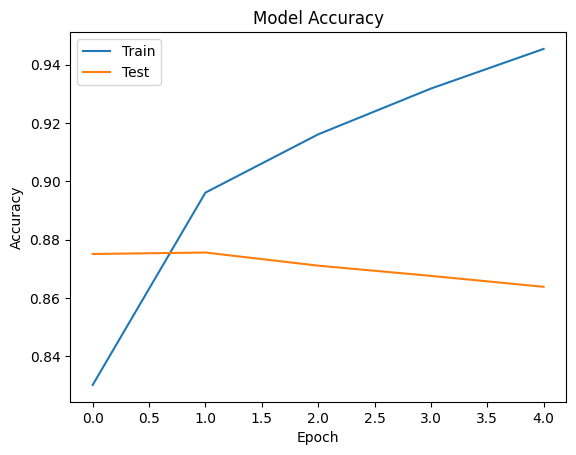

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Make Predictions**

In [16]:
import numpy as np

def predict_sentiment(review):
    review_cleaned = clean_text(review)
    review_seq = tokenizer.texts_to_sequences([review_cleaned])
    review_pad = pad_sequences(review_seq, maxlen=max_length)
    prediction = model.predict(review_pad)
    predicted_label = (prediction > 0.5).astype(int)
    return predicted_label[0][0]

while True:
    user_review = input("Enter a movie review (or type 'exit' to quit): ")
    if user_review.lower() == 'exit':
        break
    sentiment = predict_sentiment(user_review)
    sentiment_label = "Positive" if sentiment == 1 else "Negative"
    print(f"Predicted sentiment: {sentiment_label} ({sentiment})")


Enter a movie review (or type 'exit' to quit): i do not like this movie
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted sentiment: Negative (0)
Enter a movie review (or type 'exit' to quit): this movie was awesome
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted sentiment: Positive (1)
Enter a movie review (or type 'exit' to quit): it is waste of time and money
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted sentiment: Negative (0)
Enter a movie review (or type 'exit' to quit): exit
